## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Practice Skills

Binary classification
Python and R basics

**Importing ideas from notebooks of:**
    1. Omar El GabryA Journey through Titanic
    https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
    2. Matthew GoldeyFeature selection and classifier testing
    https://www.kaggle.com/mgoldey/titanic/feature-selection-and-classifier-testing
    3. Manav SehgalTitanic Data Science Solutions
    https://www.kaggle.com/startupsci/titanic/titanic-data-science-solutions/notebook
    4. Megan RisdalExploring Survival on the Titanic
    https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic
    

In [1]:
killedSum = 1502
passengerSum = 2224
killedRatio = float(killedSum) / passengerSum
print('Survived: ', 1-killedRatio, '%')
print('Died: ', killedRatio, '%')

Survived:  0.32464028776978415 %
Died:  0.6753597122302158 %


## Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

### Metric

Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

### Submission File Format

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)
PassengerId,Survived
 892,0
 893,1
 894,0
 Etc.

# Machine Learning from Start to Finish with Scikit-Learn

This notebook covers the basic Machine Learning process in Python step-by-step. Go from raw data to at least 78% accuracy on the Titanic Survivors dataset. 

### Steps Covered


1. Importing  a DataFrame
2. Visualize the Data
3. Cleanup and Transform the Data
4. Encode the Data
5. Split Training and Test Sets
6. Fine Tune Algorithms
7. Cross Validate with KFold
8. Upload to Kaggle

In [2]:
# data analysis and wrangling
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd
import re as re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# utils
import math
import pylab as P

# machine learning
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.cross_validation import train_test_split

import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import pointbiserialr, spearmanr

/Users/adi/anaconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Aquire data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

### Analyze by describing data

**Which features are available in the dataset?**

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Data Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Which features are categorical?**

Categorical - dont have a measurement unit (nominal|ordinal|ratio|interval based)

nominal: 'Survived', 'Sex', 'Embarked' (data values was nominated - given name like survived or not are 0 & 1)

ordinal: 'Pclass' (data values having some order, series, or series based)


Numerical -> Non- categorical -> have a measurement unit (discrete, continous, timeseries based)

discrete: 'SibSp' 'Parch'

continous: 'Age', 'Fare' 


Mixed -> Alphanumerical -> 'Cabin', 'Ticket'

Missing from analyze

'Name'

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Which features might contain errors?**
Name might contain errors because it's free text and people tend to describe people and many naunces
Cabin - some values are NaN
Age - some cases of missing NaN
SibSp & Parch - might have missing values?
Ticket - some values have variations mixed alphanumeric or simple numeric might be an error

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.00,0,0,367231,7.7500,NaN,Q
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.00,1,2,C.A. 2315,20.5750,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S


In [8]:
test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
355,1247,1,"Julian, Mr. Henry Forbes",male,50.0,0,0,113044,26.0000,E60,S
253,1145,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S
161,1053,3,"Touma, Master. Georges Youssef",male,7.0,1,1,2650,15.2458,NaN,C
170,1062,3,"Lithman, Mr. Simon",male,NaN,0,0,S.O./P.P. 251,7.5500,NaN,S
299,1191,3,"Johansson, Mr. Nils",male,29.0,0,0,347467,7.8542,NaN,S
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
166,1058,1,"Brandeis, Mr. Emil",male,48.0,0,0,PC 17591,50.4958,B10,C
286,1178,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
162,1054,2,"Wright, Miss. Marion",female,26.0,0,0,220844,13.5000,NaN,S


**Which features contain blank, null or empty values?**

These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.

Cabin > Age are incomplete in case of test dataset.

Empties can be easily seen using info() function of dataframe & then investigating the count of values of that field compared to the total rows.

Embarked can be seen empty in the info of the dataframe (aswell as age & cabin)

**What are the data types for various features?**

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
print('_'*40)
test_df.info()

________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Investigating the data 
Sample Size

In [11]:
samplesTotal = train_df.shape[0]
print(samplesTotal)

891


Precent of training data of the total passengers

In [12]:
print(samplesTotal/passengerSum, '% of total passangers')

0.4006294964028777 % of total passangers


**What is the distribution of the numeric data?**

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


At which precentile most people died because 0 = non survived show that 38% of samples survived

In [14]:
train_df.dropna().loc[train_df['Fare']==0.0,['PassengerId','Name','Embarked','Ticket','Survived','Pclass','Age','SibSp','Parch','Fare']]

,PassengerId,Name,Embarked,Ticket,Survived,Pclass,Age,SibSp,Parch,Fare
263,264,"Harrison, Mr. William",S,112059,0,1,40.0,0,0,0.0
806,807,"Andrews, Mr. Thomas Jr",S,112050,0,1,39.0,0,0,0.0


In [15]:
train_df.Survived.describe(percentiles=[.60, .61, .62, .63, .64])

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
50%        0.000000
60%        0.000000
61%        0.000000
62%        1.000000
63%        1.000000
64%        1.000000
max        1.000000
Name: Survived, dtype: float64

**Precent of passangers without children or parents**

In [16]:
sum(train_df.Parch==0) / samplesTotal

0.76094276094276092

Ratio of uniques cabins per total cabins

In [17]:
1 - ( 147 / 204 )

0.27941176470588236

Ratio of unique tickets per total passangers

In [18]:
1 - ( 681 / 891 )

0.23569023569023573

At which precentile value change to 1 which indicate how many passanger travelled without children or parent which show that 76% of passangers were without children or parents 

In [19]:
train_df.Parch.describe(percentiles=[.76, .77, .78, .8, .9, .99])

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
50%        0.000000
76%        0.000000
77%        1.000000
78%        1.000000
80%        1.000000
90%        2.000000
99%        4.000000
max        6.000000
Name: Parch, dtype: float64

At which precentile the value changes to 1 which indicate the precent of passangers which had no children or spouse or vice verse which precent did travelled which children or spouse

In [20]:
train_df.SibSp.describe(percentiles=[.68, .69])

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
50%        0.000000
68%        0.000000
69%        1.000000
max        8.000000
Name: SibSp, dtype: float64

Only less the 1% were at the age > 66

In [21]:
train_df.Age.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64

**What is the distribution of the string data?**

In [22]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McDermott, Miss. Brigdet Delia",male,347082,G6,S
freq,1,577,7,4,644


At this point after collecting & overviewing how the data distribute, we can list our current assumptions about correlating, completing, correcting, creating & classifying the data

Actual brainstroming cross-referencing the data features with each of the listed actions.
We try to answer questions like - Does age fits our model? Should we complete age? should we put effort on that feature or drop it?

## Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.
### Correlating.
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
### Completing.
We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
### Correcting.
Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
### Creating.
We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.
### Classifying.
We may also add to our assumptions based on the problem description noted earlier.
Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

TODO

The problem is a closed one rather then an open problem - the people survived are known, can we let the machine know about it? should we care?
Does cabin have influence of survivability?
Does ticket have influence on survivability?
is fare related to cabin? are they linear? do they say the same thing?
How the concept of family should be eng. from the data as new field


## Analyzing by pivoting features

In [23]:
alignmentColumn = 'Survived'

def pivotBySurvived(featureName):
    return train_df[[featureName,alignmentColumn]].groupby([featureName], as_index=False).mean().sort_values(by=alignmentColumn, ascending=False)

In [24]:
pivotBySurvived('Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [25]:
pivotBySurvived('Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
pivotBySurvived('SibSp')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [27]:
pivotBySurvived('Parch')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
print(train_df['Age'].isnull().sum())
print(177/891, 1-(177/891))
train_df['Age'].describe()

177
0.19865319865319866 0.8013468013468014


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
#train_df.loc[(train_df['Ticket']=='244373'),['Name','Age', 'Fare','Pclass','Ticket','Cabin','Embarked','Sex','SibSp','Parch','PassengerId']]
train_df.loc[(train_df['Embarked']=='S') & (train_df['Fare']>10.0) & (train_df['Fare']<16.0) ,['Name','Age', 'Fare','Pclass','Ticket','Cabin','Embarked','Sex','SibSp','Parch','PassengerId']]

#train_df.loc[(train_df['Ticket']=='30887'),['Name','Age', 'Fare','Pclass','Ticket','Cabin','Embarked','Sex','SibSp','Parch','PassengerId']]


,Name,Age,Fare,Pclass,Ticket,Cabin,Embarked,Sex,SibSp,Parch,PassengerId
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.00,11.1333,3,347742,NaN,S,female,0,2,9
17,"Williams, Mr. Charles Eugene",NaN,13.0000,2,244373,NaN,S,male,0,0,18
21,"Beesley, Mr. Lawrence",34.00,13.0000,2,248698,D56,S,male,0,0,22
33,"Wheadon, Mr. Edward H",66.00,10.5000,2,C.A. 24579,NaN,S,male,0,0,34
56,"Rugg, Miss. Emily",21.00,10.5000,2,C.A. 31026,NaN,S,female,0,0,57
66,"Nye, Mrs. (Elizabeth Ramell)",29.00,10.5000,2,C.A. 29395,F33,S,female,0,0,67
70,"Jenkin, Mr. Stephen Curnow",32.00,10.5000,2,C.A. 33111,NaN,S,male,0,0,71
79,"Dowdell, Miss. Elizabeth",30.00,12.4750,3,364516,NaN,S,female,0,0,80
84,"Ilett, Miss. Bertha",17.00,10.5000,2,SO/C 14885,NaN,S,female,0,0,85
85,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",33.00,15.8500,3,3101278,NaN,S,female,3,0,86


In [31]:
train_df.loc[(train_df['PassengerId']>0) & (train_df['PassengerId']<10),['Name','Age', 'Fare','Pclass','Ticket','Cabin','Embarked','Sex','SibSp','Parch','PassengerId']]

,Name,Age,Fare,Pclass,Ticket,Cabin,Embarked,Sex,SibSp,Parch,PassengerId
0,"Braund, Mr. Owen Harris",22.0,7.2500,3,A/5 21171,NaN,S,male,1,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,1,PC 17599,C85,C,female,1,0,2
2,"Heikkinen, Miss. Laina",26.0,7.9250,3,STON/O2. 3101282,NaN,S,female,0,0,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,1,113803,C123,S,female,1,0,4
4,"Allen, Mr. William Henry",35.0,8.0500,3,373450,NaN,S,male,0,0,5
5,"Moran, Mr. James",NaN,8.4583,3,330877,NaN,Q,male,0,0,6
6,"McCarthy, Mr. Timothy J",54.0,51.8625,1,17463,E46,S,male,0,0,7
7,"Palsson, Master. Gosta Leonard",2.0,21.0750,3,349909,NaN,S,male,3,1,8
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,11.1333,3,347742,NaN,S,female,0,2,9


In [32]:
train_df.loc[train_df['Age'].isnull(),['Name','Age', 'Fare','Pclass','Ticket','Cabin','Embarked','Sex','SibSp','Parch','PassengerId']]

,Name,Age,Fare,Pclass,Ticket,Cabin,Embarked,Sex,SibSp,Parch,PassengerId
5,"Moran, Mr. James",NaN,8.4583,3,330877,NaN,Q,male,0,0,6
17,"Williams, Mr. Charles Eugene",NaN,13.0000,2,244373,NaN,S,male,0,0,18
19,"Masselmani, Mrs. Fatima",NaN,7.2250,3,2649,NaN,C,female,0,0,20
26,"Emir, Mr. Farred Chehab",NaN,7.2250,3,2631,NaN,C,male,0,0,27
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,7.8792,3,330959,NaN,Q,female,0,0,29
29,"Todoroff, Mr. Lalio",NaN,7.8958,3,349216,NaN,S,male,0,0,30
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,146.5208,1,PC 17569,B78,C,female,1,0,32
32,"Glynn, Miss. Mary Agatha",NaN,7.7500,3,335677,NaN,Q,female,0,0,33
36,"Mamee, Mr. Hanna",NaN,7.2292,3,2677,NaN,C,male,0,0,37
42,"Kraeff, Mr. Theodor",NaN,7.8958,3,349253,NaN,C,male,0,0,43


In [33]:
train_df.loc[(train_df['Embarked']=='Q') & (train_df['Fare']>8) & (train_df['Fare']<9),['Age', 'Fare','Pclass','Ticket','Cabin','Embarked','Sex','SibSp','Parch','PassengerId']]

,Age,Fare,Pclass,Ticket,Cabin,Embarked,Sex,SibSp,Parch,PassengerId
5,NaN,8.4583,3,330877,NaN,Q,male,0,0,6
22,15.0,8.0292,3,330923,NaN,Q,female,0,0,23
680,NaN,8.1375,3,330935,NaN,Q,female,0,0,681


In [86]:
train_df.loc[(train_df['Age']<1.0), ['Age','Survived']]

,Age,Survived
78,0.83,1
164,1.00,0
172,1.00,1
183,1.00,1
305,0.92,1
381,1.00,1
386,1.00,0
469,0.75,1
644,0.75,1
755,0.67,1


In [87]:
n_bins = np.linspace(0, 80, 81)
train_df['AgeBand'] = pd.cut(train_df['Age'].dropna(), n_bins, right=False)
ageSurvivibility_df = train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean()
print(ageSurvivibility_df)

     AgeBand  Survived
0     [0, 1)  1.000000
1     [1, 2)  0.714286
2     [2, 3)  0.300000
3     [3, 4)  0.833333
4     [4, 5)  0.700000
5     [5, 6)  1.000000
6     [6, 7)  0.666667
7     [7, 8)  0.333333
8     [8, 9)  0.500000
9    [9, 10)  0.250000
10  [10, 11)  0.000000
11  [11, 12)  0.250000
12  [12, 13)  1.000000
13  [13, 14)  1.000000
14  [14, 15)  0.428571
15  [15, 16)  0.800000
16  [16, 17)  0.352941
17  [17, 18)  0.461538
18  [18, 19)  0.346154
19  [19, 20)  0.360000
20  [20, 21)  0.187500
21  [21, 22)  0.208333
22  [22, 23)  0.407407
23  [23, 24)  0.312500
24  [24, 25)  0.483871
25  [25, 26)  0.260870
26  [26, 27)  0.333333
27  [27, 28)  0.611111
28  [28, 29)  0.259259
29  [29, 30)  0.400000
..       ...       ...
50  [50, 51)  0.500000
51  [51, 52)  0.285714
52  [52, 53)  0.500000
53  [53, 54)  1.000000
54  [54, 55)  0.375000
55  [55, 56)  0.333333
56  [56, 57)  0.500000
57  [57, 58)  0.000000
58  [58, 59)  0.600000
59  [59, 60)  0.000000
60  [60, 61)  0.500000
61  [61, 62

<a list of 80 Patch objects>


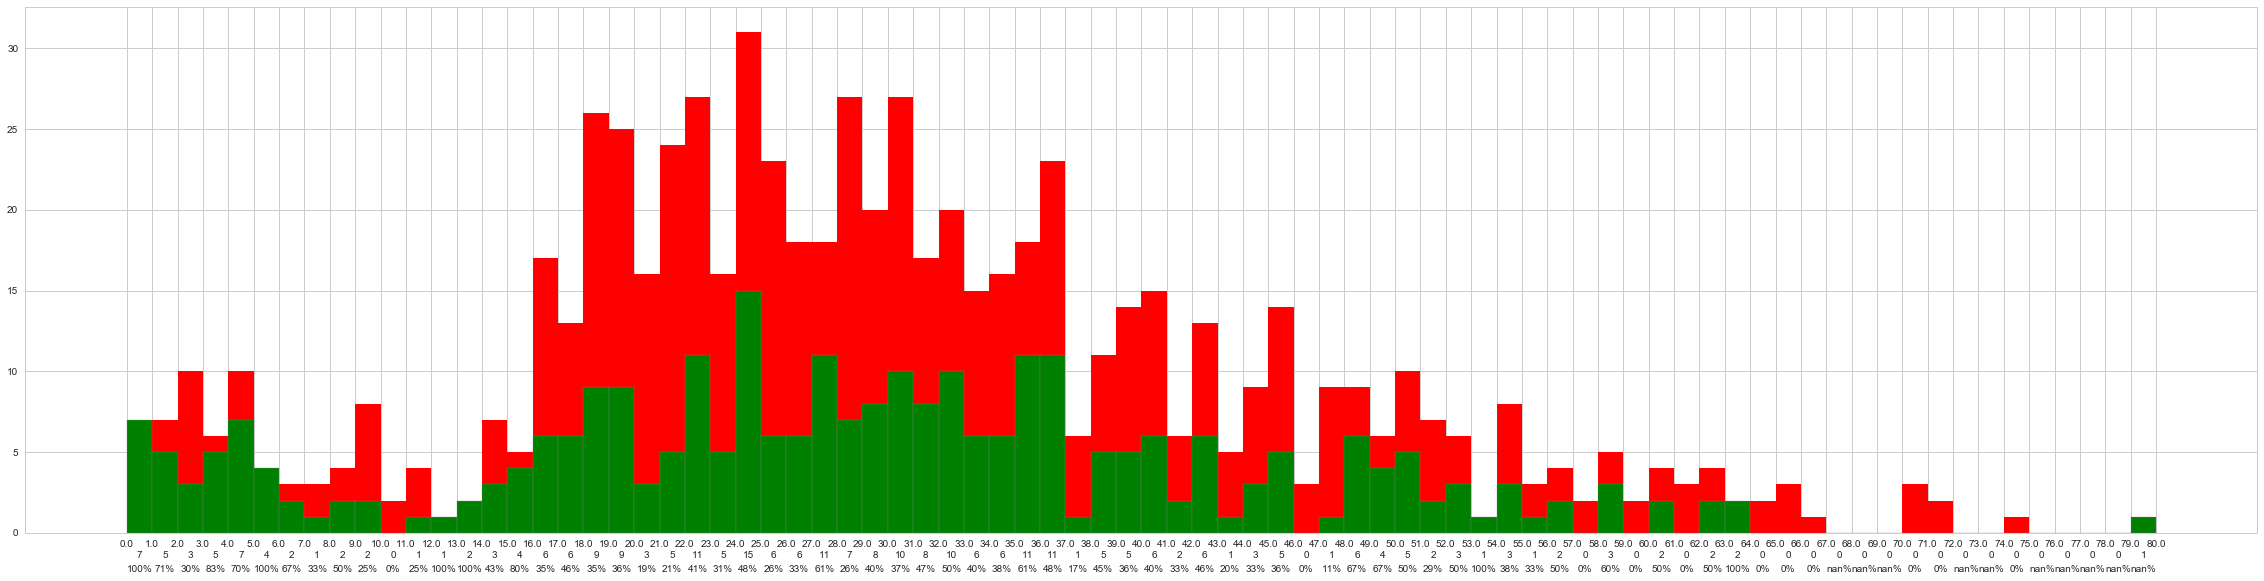

In [89]:
from matplotlib.ticker import FormatStrFormatter

ageSurvived = train_df.loc[train_df['Survived']==1, 'Age'].dropna().values
ageDied = train_df.loc[train_df['Survived']==0, 'Age'].dropna().values
ageTotal = train_df['Age'].dropna().values

fig, ax = plt.subplots(1,1,figsize=(40,10))
ax.hist(ageTotal, n_bins, alpha=1.0, color='red', label='Died')
counts, bins, patches = ax.hist(ageSurvived, n_bins, alpha=1.0, facecolor='green', edgecolor='gray')
print(patches)
# Set the ticks to be at the edges of the bins.
bins = n_bins
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(ageSurvived, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('green')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x, survivibility in zip(counts, bin_centers, ageSurvivibility_df['Survived'].values):
    # Label the raw counts
    ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * survivibility)
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.show()

In [95]:
train_df.Fare.sort_values().unique()

array([   0.    ,    4.0125,    5.    ,    6.2375,    6.4375,    6.45  ,
          6.4958,    6.75  ,    6.8583,    6.95  ,    6.975 ,    7.0458,
          7.05  ,    7.0542,    7.125 ,    7.1417,    7.225 ,    7.2292,
          7.25  ,    7.3125,    7.4958,    7.5208,    7.55  ,    7.6292,
          7.65  ,    7.725 ,    7.7292,    7.7333,    7.7375,    7.7417,
          7.75  ,    7.775 ,    7.7875,    7.7958,    7.8   ,    7.8292,
          7.8542,    7.875 ,    7.8792,    7.8875,    7.8958,    7.925 ,
          8.0292,    8.05  ,    8.1125,    8.1375,    8.1583,    8.3   ,
          8.3625,    8.4042,    8.4333,    8.4583,    8.5167,    8.6542,
          8.6625,    8.6833,    8.7125,    8.85  ,    9.    ,    9.2167,
          9.225 ,    9.35  ,    9.475 ,    9.4833,    9.5   ,    9.5875,
          9.825 ,    9.8375,    9.8417,    9.8458,   10.1708,   10.4625,
         10.5   ,   10.5167,   11.1333,   11.2417,   11.5   ,   12.    ,
         12.275 ,   12.2875,   12.35  ,   12.475 , 

                 FareBand  Survived
0             [0, 5.0485)  0.058824
1       [5.0485, 10.0971)  0.206897
2       [10.0971, 15.146)  0.376000
3        [15.146, 20.194)  0.537037
4        [20.194, 25.243)  0.404762
5        [25.243, 30.291)  0.460784
6         [30.291, 35.34)  0.352941
7         [35.34, 40.388)  0.434783
8        [40.388, 45.437)  0.500000
9        [45.437, 50.485)  0.181818
10       [50.485, 55.534)  0.636364
11       [55.534, 60.583)  0.812500
12       [60.583, 65.631)  0.500000
13        [65.631, 70.68)  0.272727
14        [70.68, 75.728)  0.333333
15       [75.728, 80.777)  0.727273
16       [80.777, 85.825)  0.750000
17       [85.825, 90.874)  0.888889
18       [90.874, 95.922)  1.000000
19      [95.922, 100.971)       NaN
20    [100.971, 106.0194)       NaN
21    [106.0194, 111.068)  0.625000
22     [111.068, 116.117)  0.666667
23     [116.117, 121.165)  1.000000
24     [121.165, 126.214)       NaN
25     [126.214, 131.262)       NaN
26     [131.262, 136.311)  0

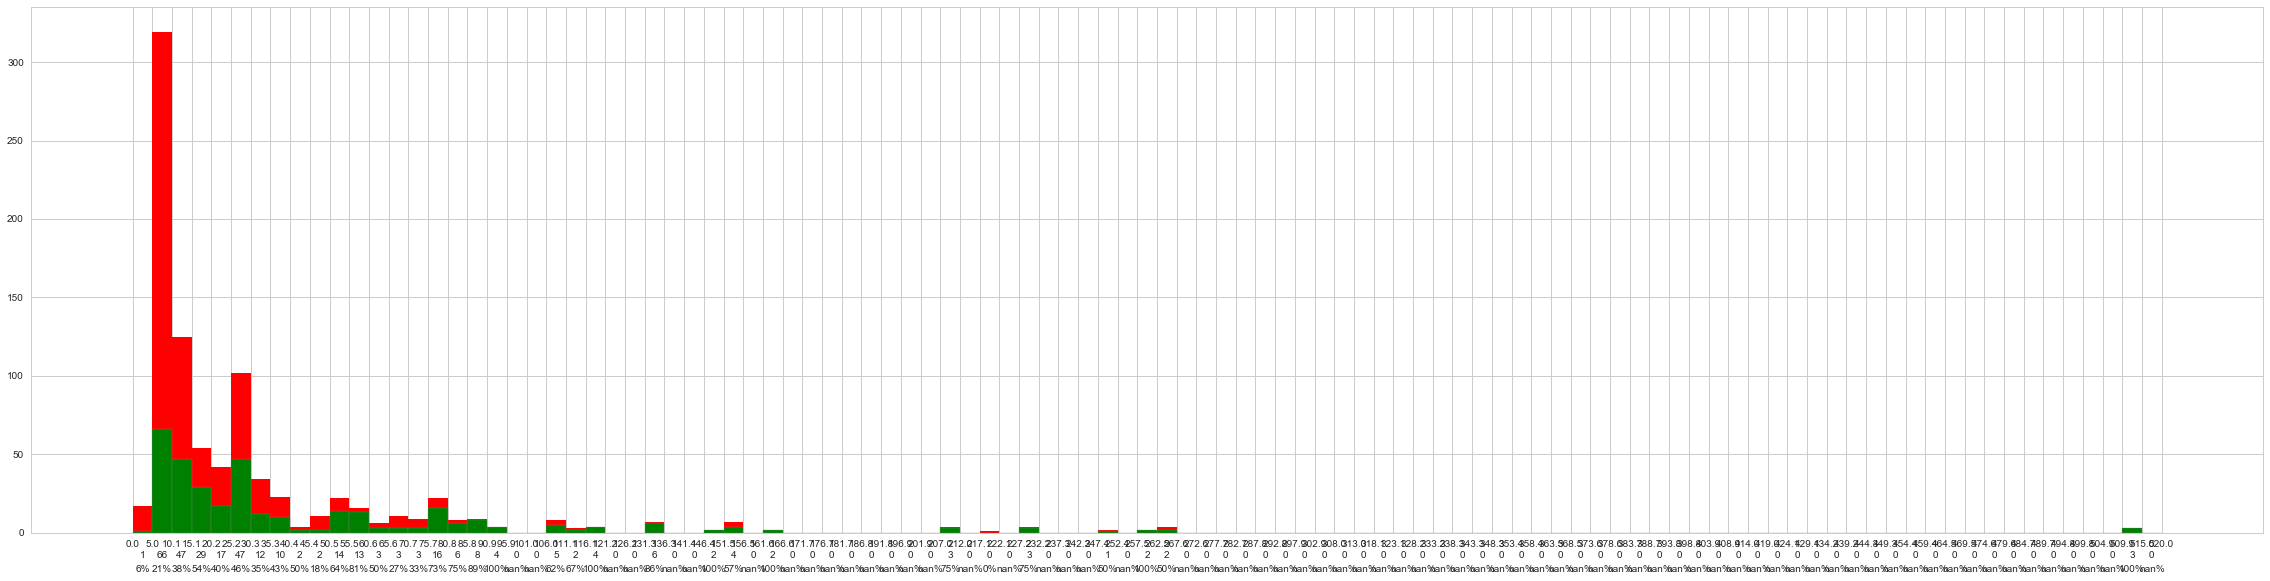

In [96]:
#n_bins = np.linspace(0, 520, 52)
n_bins = np.linspace(0, 520, 104)
train_df['FareBand'] = pd.cut(train_df['Fare'].dropna(), n_bins, right=False)
fareSurvivibility_df = train_df[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean()
print(fareSurvivibility_df)


fareSurvived = train_df.loc[train_df['Survived']==1, 'Fare'].dropna().values
faerDied = train_df.loc[train_df['Survived']==0, 'Fare'].dropna().values
fareTotal = train_df['Fare'].dropna().values

fig, ax = plt.subplots(1,1,figsize=(40,10))
ax.hist(fareTotal, n_bins, alpha=1.0, color='red', label='Died')
counts, bins, patches = ax.hist(fareSurvived, n_bins, alpha=1.0, facecolor='green', edgecolor='gray')
print(patches)
# Set the ticks to be at the edges of the bins.
bins = n_bins
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(fareSurvived, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('green')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x, survivibility in zip(counts, bin_centers, fareSurvivibility_df['Survived'].values):
    # Label the raw counts
    ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * survivibility)
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.show()

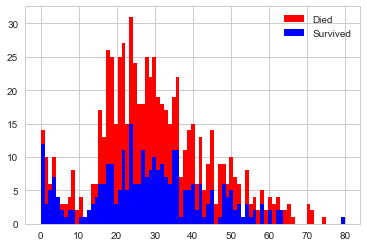

In [34]:
"""
=============================================================
Demo of the histogram (hist) function with multiple data sets
=============================================================

Plot histogram with multiple sample sets and demonstrate:

    * Use of legend with multiple sample sets
    * Stacked bars
    * Step curve with no fill
    * Data sets of different sample sizes

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
ageSurvived = train_df.loc[train_df['Survived']==1, 'Age'].dropna().values
ageDied = train_df.loc[train_df['Survived']==0, 'Age'].dropna().values
ageTotal = train_df['Age'].dropna().values

n_bins = np.linspace(0, 80, 80)
#x = pd.concat([ageTotal, ageSurvived, ageDied], axis=1, keys=['Total','Survived','Died']).values
#x = pd.concat([ageSurvived, ageDied], axis=1, keys=['Survived','Died']).fillna(0).values
#x = [ageDied,ageSurvived]

plt.hist(ageTotal, n_bins, alpha=1.0, color='red', label='Died')
#plt.hist(ageDied, n_bins, alpha=0.5, color='red', label='Died')
plt.hist(ageSurvived, n_bins, alpha=1.0, color='blue', label='Survived')
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")
plt.legend(loc='upper right')
plt.show()

#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18,20))
#ax0, ax1 = axes.flatten()

#colors = ['lime', 'red']
#labels = ['Survived','Died']
#ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=labels)
#ax0.hist(x, n_bins, histtype='bar', label=labels, color=colors)
#ax0.legend(prop={'size': 20})
#ax0.set_title('Survivability by Age')

#ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
#ax1.hist(x, n_bins, histtype='bar', stacked=True, normed=True, label=labels, color=colors)
#ax0.legend(prop={'size': 20})
#ax0.set_title('Survivability by Age')

#fig.tight_layout()
#plt.show()

In [51]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 80)
ageSurvivibility_df = train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean()
print(ageSurvivibility_df)

                AgeBand  Survived
0         (0.34, 1.415]  0.857143
1        (1.415, 2.409]  0.300000
2        (2.409, 3.404]  0.833333
3        (3.404, 4.399]  0.700000
4        (4.399, 5.394]  1.000000
5        (5.394, 6.389]  0.666667
6        (6.389, 7.383]  0.333333
7        (7.383, 8.378]  0.500000
8        (8.378, 9.373]  0.250000
9       (9.373, 10.367]  0.000000
10     (10.367, 11.362]  0.250000
11     (11.362, 12.357]  1.000000
12     (12.357, 13.352]  1.000000
13     (13.352, 14.347]  0.500000
14     (14.347, 15.341]  0.666667
15     (15.341, 16.336]  0.352941
16     (16.336, 17.331]  0.461538
17     (17.331, 18.326]  0.346154
18      (18.326, 19.32]  0.360000
19      (19.32, 20.315]  0.200000
20      (20.315, 21.31]  0.200000
21      (21.31, 22.305]  0.407407
22     (22.305, 23.299]  0.333333
23     (23.299, 24.294]  0.483871
24     (24.294, 25.289]  0.250000
25     (25.289, 26.284]  0.333333
26     (26.284, 27.278]  0.611111
27     (27.278, 28.273]  0.280000
28     (28.273

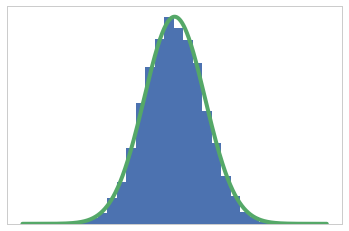

In [47]:
"""
===========================
Frontpage histogram example
===========================

This example reproduces the frontpage histogram example.
"""

random_state = np.random.RandomState(19680801)
X = random_state.randn(10000)

fig, ax = plt.subplots()
ax.hist(X, bins=25, normed=True)
x = np.linspace(-5, 5, 1000)
ax.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=4)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("histogram_frontpage.png", dpi=25)  # results in 160x120 px image

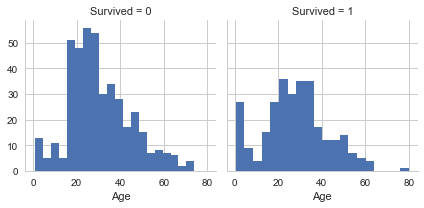

In [44]:
g = sns.FacetGrid(train_df,col=alignmentColumn)
g.map(plt.hist, 'Age', bins=20)

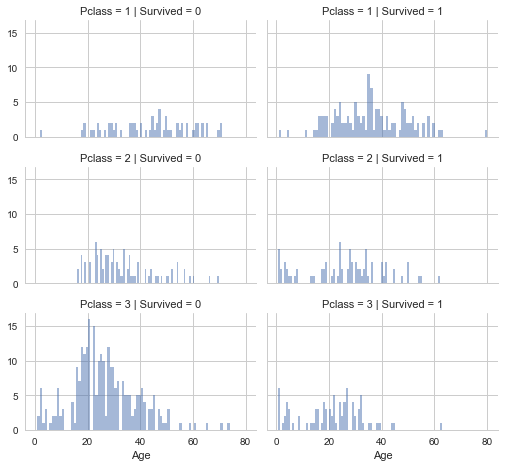

In [28]:
grid = sns.FacetGrid(train_df, col=alignmentColumn, row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=80)
grid.add_legend()

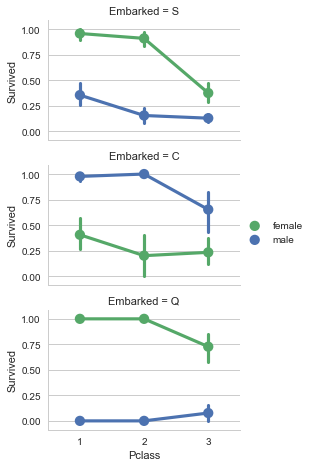

In [29]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

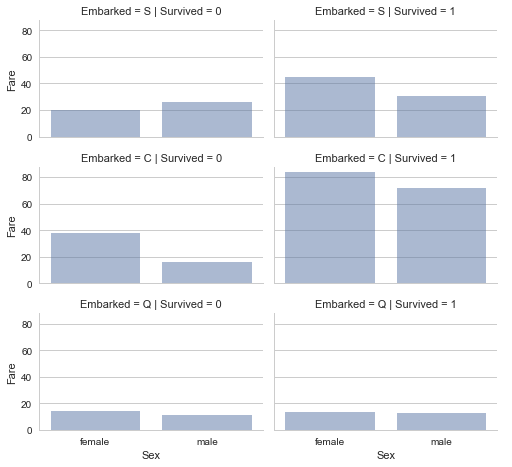

In [30]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

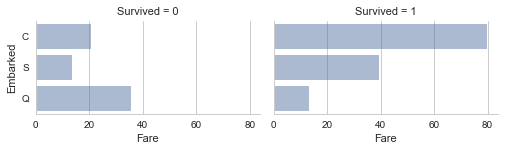

In [31]:
grid = sns.FacetGrid(train_df, col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Fare', 'Embarked', alpha=.5, ci=None)
grid.add_legend()

In [32]:
95/168

0.5654761904761905

In [33]:
441/644

0.6847826086956522

In [34]:
41/77

0.5324675324675324

Having the following columns of data:
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
 
we want to predict if someone survived yes or no - so survived is 100% correlated to the problem and also the output
PassangerId is just a running number and have no correlation to the survavability - can be reduced - do we need it for output? does it matters

**Is Pclass correlated to Survivability?**
* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
* Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
* Pclass varies in terms of Age distribution of passengers.

1. Consider Pclass for model training.

**Is name correlated to the problem?**

**Is sex correlated to the problem?**
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

1. Add Sex feature to model training.

**Is age correlated to the problem?**
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

1. We should consider Age (our assumption classifying #2) in our model training.
2. Complete the Age feature for null values (completing #1).
3. We should band age groups (creating #3).

**Is SibSp correlated to the problem?**
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

**Is Parch correlated to the problem?**
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

**is Ticket correlated to the problem?**

**Is Fare correlated to the problem?**
* Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.

**Is Cabin correlated to the problem?**

**Is Embarked correlated to the problem?**
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).
* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

1. Complete and add Embarked feature to model training.













## Wranglin Data
### Correcting by dropping features

In [35]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Cabin', 'Ticket'], axis=1)
test_df = test_df.drop(['Cabin', 'Ticket'], axis=1)
combine = [train_df, test_df]
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


## Creating a new feature extracting from existing

In [36]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [38]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major'], 'Prof')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Don', 'Dona'],'Royal')
    dataset['Title'] = dataset['Title'].replace(['Rev', 'Sir', 'Jonkheer'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title','Survived']].groupby('Title', as_index=False).mean().sort_values('Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
6,Royal,0.666667
0,Master,0.575000
4,Prof,0.416667
2,Mr,0.156673
5,Rare,0.125000


In [40]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Prof": 5, "Royal": 6, "Rare": 7}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    #dataset['Title'].astype('category')
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0


In [39]:
print('Before', train_df.shape, test_df.shape)
train_df = train_df.drop(['PassengerId','Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
print('After', train_df.shape, test_df.shape)

Before (891, 11) (418, 10)
After (891, 9) (418, 9)


/Users/adi/anaconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/adi/anaconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


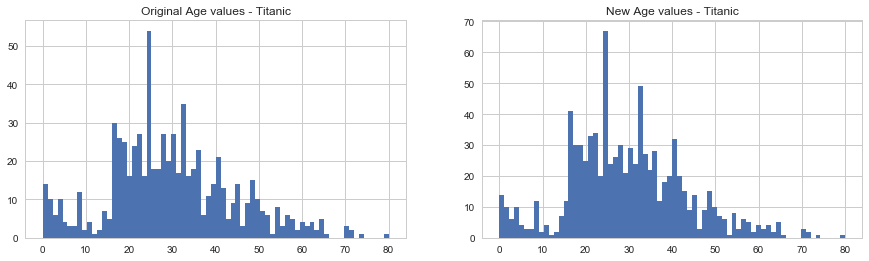

In [40]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = train_df["Age"].mean()
std_age_titanic       = train_df["Age"].std()
count_nan_age_titanic = train_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
train_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
train_df["Age"][np.isnan(train_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
train_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

/Users/adi/anaconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


   Family  Survived
0       0  0.303538
1       1  0.578767
2       2  0.161290


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,Alone,SmallF,LargeF
0,0,3,male,22,1,0,7.2500,S,1,1,0,1,0
1,1,1,female,38,1,0,71.2833,C,3,1,0,1,0
2,1,3,female,26,0,0,7.9250,S,2,0,1,0,0
3,1,1,female,35,1,0,53.1000,S,3,1,0,1,0
4,0,3,male,35,0,0,8.0500,S,1,0,1,0,0


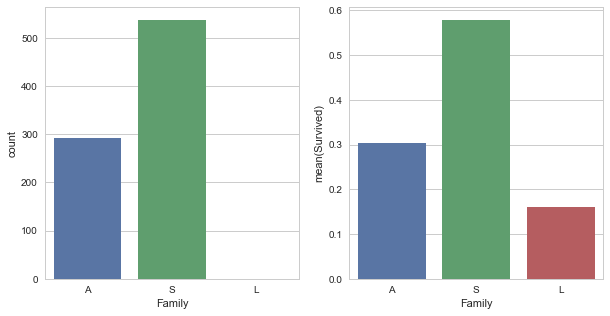

In [41]:
# Family

# Create a family size variable including the passenger themselves
train_df['Family'] =  train_df["Parch"] + train_df["SibSp"] + 1
train_df['Family'].loc[train_df['Family'] == 1] = 0
train_df['Family'].loc[(train_df['Family'] > 1) & (train_df['Family'] < 5)] = 1
train_df['Family'].loc[train_df['Family'] > 4] = 2

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"] + 1
test_df['Family'].loc[test_df['Family'] == 1] = 0
test_df['Family'].loc[(test_df['Family'] > 1) & (test_df['Family'] < 5)] = 1
test_df['Family'].loc[test_df['Family'] > 4] = 2

# drop Parch & SibSp
#train_df = train_df.drop(['SibSp','Parch'], axis=1)
#test_df    = test_df.drop(['SibSp','Parch'], axis=1)
combine = [train_df, test_df]
# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=train_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=train_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
print(family_perc)
sns.barplot(x='Family', y='Survived', data=family_perc, order=[0,1,2], ax=axis2)

axis1.set_xticklabels(["A","S","L"], rotation=0)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
family_dummies_titanic  = pd.get_dummies(train_df['Family'])
family_dummies_titanic.columns = ['Alone','SmallF','LargeF']
#family_dummies_titanic.drop(['Male'], axis=1, inplace=True)

family_dummies_test  = pd.get_dummies(test_df['Family'])
family_dummies_test.columns = ['Alone','SmallF','LargeF']
#family_dummies_test.drop(['Male'], axis=1, inplace=True)

train_df = train_df.join(family_dummies_titanic)
test_df    = test_df.join(family_dummies_test)
combine = [train_df, test_df]
train_df.head()

In [42]:
# Family by Omar version - left for reference

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
#train_df['Family'] =  train_df["Parch"] + train_df["SibSp"]
#train_df['Family'].loc[train_df['Family'] > 0] = 1
#train_df['Family'].loc[train_df['Family'] == 0] = 0

#test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
#test_df['Family'].loc[test_df['Family'] > 0] = 1
#test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
#train_df = train_df.drop(['SibSp','Parch'], axis=1)
#test_df    = test_df.drop(['SibSp','Parch'], axis=1)
#combine = [train_df, test_df]
# plot
#fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=train_df,kind='count',ax=axis1)
#sns.countplot(x='Family', data=train_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
#family_perc = train_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
#sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

#axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [43]:
#for dataset in combine:
#    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,Alone,SmallF,LargeF
0,0,3,male,22,1,0,7.2500,S,1,1,0,1,0
1,1,1,female,38,1,0,71.2833,C,3,1,0,1,0
2,1,3,female,26,0,0,7.9250,S,2,0,1,0,0
3,1,1,female,35,1,0,53.1000,S,3,1,0,1,0
4,0,3,male,35,0,0,8.0500,S,1,0,1,0,0


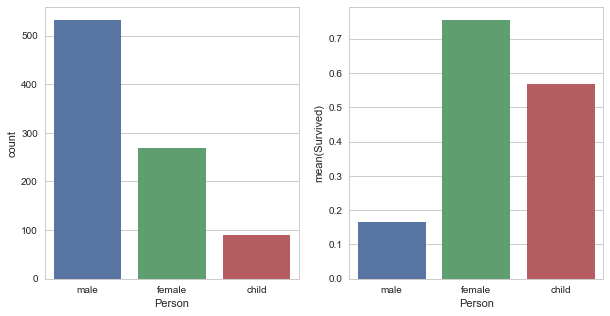

In [44]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
train_df['Person'] = train_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(train_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train_df = train_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=train_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=train_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)
combine = [train_df, test_df]

**Question to self**
Is it good to set a categorical feature to 0?
will 0 not affect the computation in some way?

In [45]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,Alone,SmallF,LargeF,Child,Female
0,0,3,0,22,1,0,7.2500,S,1,1,0,1,0,0,0
1,1,1,1,38,1,0,71.2833,C,3,1,0,1,0,0,1
2,1,3,1,26,0,0,7.9250,S,2,0,1,0,0,0,1
3,1,1,1,35,1,0,53.1000,S,3,1,0,1,0,0,1
4,0,3,0,35,0,0,8.0500,S,1,0,1,0,0,0,0


In [46]:
#guess_ages = np.zeros((2,3))
#guess_ages

In [47]:
#for dataset in combine:
#    for i in range(0, 2):
#        for j in range(0, 3):
#            guess_df = dataset[ (dataset.Sex == i) & (dataset.Pclass == j+1) ]['Age'].dropna()
            
            #age_mean = guess_fd 
            #age_std = guess_df
            #age_guess = rnd.uniform( age_mean - age_std, age_mean + age_std )
            
#            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
#            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
#    for i in range(0, 2):
#        for j in range(0, 3):
#            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
            
            
#    dataset['Age'] = dataset['Age'].astype(int)
    
#train_df.head()

In [48]:
#train_df['AgeBand'] = pd.cut(train_df['Age'], 20)
#train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean()

In [49]:
#for dataset in combine:
#    dataset.loc[dataset['Age'] <= 4, 'Age'] = 0
#    dataset.loc[(dataset['Age'] > 4) & (dataset['Age'] <= 8), 'Age'] = 1
#    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 12), 'Age'] = 2
#    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 16), 'Age'] = 3
#    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 20), 'Age'] = 4
#    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 24), 'Age'] = 5
#    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 28), 'Age'] = 6
#    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 7
#    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 36), 'Age'] = 8
#    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 40), 'Age'] = 9
#    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 44), 'Age'] = 10
#    dataset.loc[(dataset['Age'] > 44) & (dataset['Age'] <= 48), 'Age'] = 11
#    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 52), 'Age'] = 12
#    dataset.loc[(dataset['Age'] > 52) & (dataset['Age'] <= 56), 'Age'] = 13
#    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 60), 'Age'] = 14
#    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 64), 'Age'] = 15
#    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 68), 'Age'] = 16
#    dataset.loc[(dataset['Age'] > 68) & (dataset['Age'] <= 72), 'Age'] = 17
#    dataset.loc[(dataset['Age'] > 72) & (dataset['Age'] <= 76), 'Age'] = 18
#    dataset.loc[dataset['Age'] > 76, 'Age'] = 19
    
#train_df.head()

In [50]:
# No need to use Sex column since we created Person column
train_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

In [51]:
#train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Family,Alone,SmallF,LargeF,Child,Female
0,0,3,22,1,0,7.2500,S,1,1,0,1,0,0,0
1,1,1,38,1,0,71.2833,C,3,1,0,1,0,0,1
2,1,3,26,0,0,7.9250,S,2,0,1,0,0,0,1
3,1,1,35,1,0,53.1000,S,3,1,0,1,0,0,1
4,0,3,35,0,0,8.0500,S,1,0,1,0,0,0,0


## Create new feature combining existing features

In [52]:
freq_port = train_df['Embarked'].dropna().mode()[0]
freq_port

'S'

In [53]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


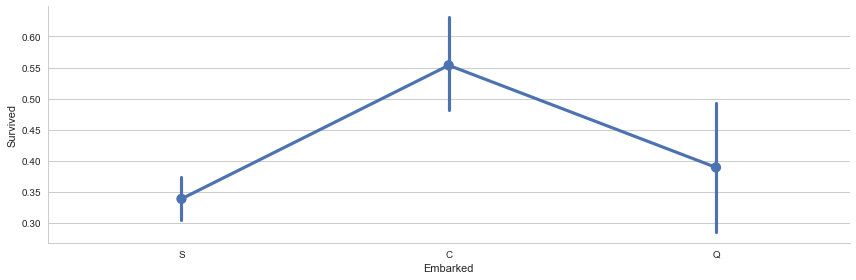

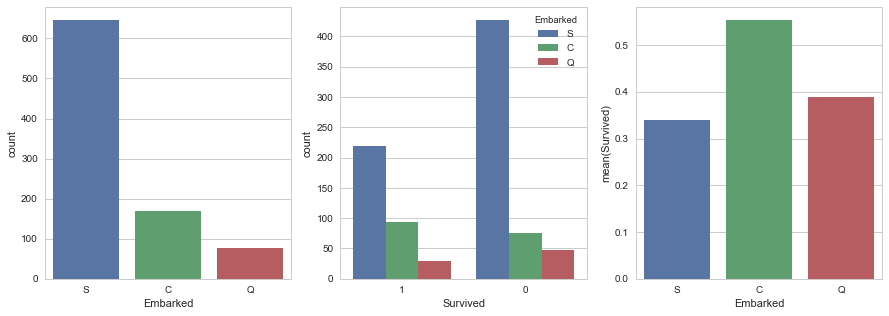

In [54]:
sns.factorplot('Embarked','Survived', data=train_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#sns.factorplot('Embarked',data=train_df,kind='count',order=['S','C','Q'],ax=axis1)
sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [55]:
# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(train_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

train_df = train_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

train_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Family,Alone,SmallF,LargeF,Child,Female,C,Q
0,0,3,22,1,0,7.2500,1,1,0,1,0,0,0,0,0
1,1,1,38,1,0,71.2833,3,1,0,1,0,0,1,1,0
2,1,3,26,0,0,7.9250,2,0,1,0,0,0,1,0,0
3,1,1,35,1,0,53.1000,3,1,0,1,0,0,1,0,0
4,0,3,35,0,0,8.0500,1,0,1,0,0,0,0,0,0


In [56]:
#for dataset in combine:
#    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
#train_df.head()

In [57]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title,Family,Alone,SmallF,LargeF,Child,Female,C,Q
0,892,3,34,0,0,7.8292,1,0,1,0,0,0,0,0,1
1,893,3,47,1,0,7.0000,3,1,0,1,0,0,1,0,0
2,894,2,62,0,0,9.6875,1,0,1,0,0,0,0,0,1
3,895,3,27,0,0,8.6625,1,0,1,0,0,0,0,0,0
4,896,3,22,1,1,12.2875,3,1,0,1,0,0,1,0,0


In [58]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 10)
train_df[['FareBand','Survived']].groupby('FareBand', as_index=False).mean()

,FareBand,Survived
0,"[0, 7.55]",0.141304
1,"(7.55, 7.854]",0.298851
2,"(7.854, 8.05]",0.179245
3,"(8.05, 10.5]",0.230769
4,"(10.5, 14.454]",0.428571
5,"(14.454, 21.679]",0.420455
6,"(21.679, 27]",0.516854
7,"(27, 39.688]",0.373626
8,"(39.688, 77.958]",0.528090
9,"(77.958, 512.329]",0.758621


In [59]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.55, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.55) & (dataset['Fare'] <= 7.854), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 8.05), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 8.05) & (dataset['Fare'] <= 10.5), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 14.454), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 21.679), 'Fare'] = 5
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 27), 'Fare'] = 6
    dataset.loc[(dataset['Fare'] > 27) & (dataset['Fare'] <= 39.688), 'Fare'] = 7
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 77.958), 'Fare'] = 8
    dataset.loc[(dataset['Fare'] > 77.958), 'Fare'] = 9
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Family,Alone,SmallF,LargeF,Child,Female,C,Q
0,0,3,22,1,0,0,1,1,0,1,0,0,0,0,0
1,1,1,38,1,0,8,3,1,0,1,0,0,1,1,0
2,1,3,26,0,0,2,2,0,1,0,0,0,1,0,0
3,1,1,35,1,0,8,3,1,0,1,0,0,1,0,0
4,0,3,35,0,0,2,1,0,1,0,0,0,0,0,0
5,0,3,32,0,0,3,1,0,1,0,0,0,0,0,1
6,0,1,54,0,0,8,1,0,1,0,0,0,0,0,0
7,0,3,2,3,1,5,4,2,0,0,1,1,0,0,0
8,1,3,27,0,2,4,3,1,0,1,0,0,1,0,0
9,1,2,14,1,0,7,3,1,0,1,0,1,0,1,0


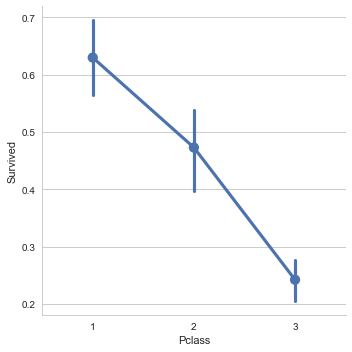

In [60]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(train_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

train_df = train_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

combine = [train_df, test_df]

In [62]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

drop_features_common = ['Family', 'Child', 'SmallF', 'Female', 'Q']
drop_features_by_classifier = [
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    []
]

train_df.drop(drop_features_common, axis=1,inplace=True)
test_df.drop(drop_features_common, axis=1,inplace=True)
    
combine = [train_df, test_df]

ValueError: labels ['Family' 'Child' 'SmallF' 'Female' 'Q'] not contained in axis

In [63]:
#train_df.drop(['Child'],axis=1,inplace=True)
#test_df.drop(['Child'],axis=1,inplace=True)
#combine = [train_df, test_df]
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Title,Alone,LargeF,C,Class_1,Class_2
0,0,22,1,0,0,1,0,0,0,0,0
1,1,38,1,0,8,3,0,0,1,1,0
2,1,26,0,0,2,2,1,0,0,0,0
3,1,35,1,0,8,3,0,0,0,1,0
4,0,35,0,0,2,1,1,0,0,0,0


## Model, predict and solve

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

In [64]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived'].values
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

In [ ]:
ITERATIONS = 40000
LEARNING_RATE = 1e-4

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)
 
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

# Let's train the model
feature_count = X_train.shape[1]
x = tf.placeholder('float', shape=[None, feature_count], name='x')
y_ = tf.placeholder('float', shape=[None, 1], name='y_')

print(x.get_shape())

nodes = 20

w1 = weight_variable([feature_count, nodes])
b1 = bias_variable([nodes])
l1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = weight_variable([nodes, 1])
b2 = bias_variable([1])
y = tf.nn.sigmoid(tf.matmul(l1, w2) + b2)

cross_entropy = -tf.reduce_mean(y_*tf.log(tf.maximum(0.00001, y)) + (1.0 - y_)*tf.log(tf.maximum(0.00001, 1.0-y)))
reg = 0.01 * (tf.reduce_mean(tf.square(w1)) + tf.reduce_mean(tf.square(w2)))

predict = (y > 0.5)

correct_prediction = tf.equal(predict, (y_ > 0.5))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
                              
                              

train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy + reg)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for i in range(ITERATIONS):
    feed={x:X_train, y_:y_train}
    sess.run(train_step, feed_dict=feed)
    if i % 1000 == 0 or i == ITERATIONS-1:
        print('{} {} {:.2f}%'.format(i, sess.run(cross_entropy, feed_dict=feed), sess.run(accuracy, feed_dict=feed)*100.0))

In [ ]:
test_data = pd.read_csv('../input/test.csv')

print(test_data.describe(include='all'))

test_features = PrepareFeatures(test_data)

print(test_features)

predicted = sess.run(predict, feed_dict={x:test_features})

# Write data

sol = pd.DataFrame()
sol['PassengerId'] = test_data['PassengerId']
sol['Survived'] = pd.Series(predicted.reshape(-1)).map({True:1, False:0})
print(sol)
sol.to_csv('solution3.csv', index=False)

(801, 10) (801,) (90, 10) (90,)
DecisionTreeClassifier Feature ranking:
1. feature 4 (0.366774)
2. feature 0 (0.270333)
3. feature 3 (0.128337)
4. feature 6 (0.075396)
5. feature 9 (0.044057)
6. feature 8 (0.040639)
7. feature 1 (0.025419)
8. feature 7 (0.019658)
9. feature 2 (0.016794)
10. feature 5 (0.012593)
RandomForestClassifier Feature ranking:
1. feature 4 (0.312173)
2. feature 0 (0.301524)
3. feature 3 (0.166095)
4. feature 8 (0.046803)
5. feature 1 (0.044599)
6. feature 6 (0.033043)
7. feature 9 (0.032556)
8. feature 7 (0.026669)
9. feature 2 (0.024455)
10. feature 5 (0.012082)
AdaBoostClassifier Feature ranking:
1. feature 0 (0.500000)
2. feature 4 (0.120000)
3. feature 3 (0.120000)
4. feature 2 (0.100000)
5. feature 1 (0.060000)
6. feature 9 (0.020000)
7. feature 8 (0.020000)
8. feature 7 (0.020000)
9. feature 6 (0.020000)
10. feature 5 (0.020000)
GradientBoostingClassifier Feature ranking:
1. feature 0 (0.393604)
2. feature 4 (0.190789)
3. feature 3 (0.185767)
4. feature 8 

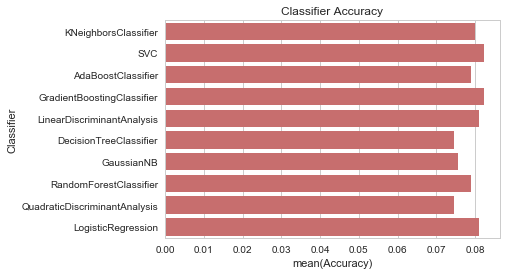

In [65]:
dtrain = X_train.values
dtest  = X_test.values

log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)
log2  = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

X = dtrain
y = y_train
#X = X_train
#y = y_train

acc_dict = {}
acc_log_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(X_train.shape, y_train.shape ,X_test.shape, y_test.shape)
    for clf in classifiers:
        #for drop_feature in drop_features_by_classifier:
        #    if len(drop_feature) > 0:
        #        X_train.drop(drop_feature, axis=1,inplace=True)
        #        X_test.drop(drop_feature, axis=1,inplace=True)
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        acc_log = round(clf.score(X_train, y_train) * 100, 2)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
            
        if name in acc_log_dict:
            acc_log_dict[name] += acc_log
        else:
            acc_log_dict[name] = acc_log
        # feature importance
        if hasattr(clf, 'feature_importances_'):
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]
            # Print the feature ranking
            print(name, "Feature ranking:")
            for f in range(X_train.shape[1]):
                print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        # plot
        #pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
        #pyplot.show()

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

for clf in acc_log_dict:
    acc_log_dict[clf] = acc_log_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_log_dict[clf]]], columns=log_cols)
    log2 = log2.append(log_entry)
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="r")

print(acc_dict)

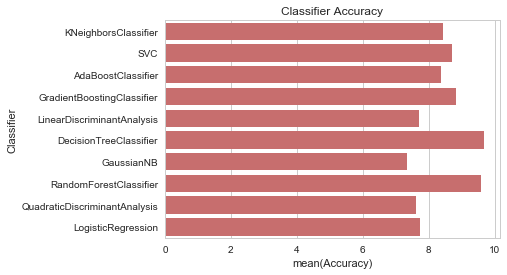

In [69]:
sns.set_color_codes("muted")

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.barplot(x='Accuracy', y='Classifier', data=log2, color="r")

In [70]:
log2

,Classifier,Accuracy
0,KNeighborsClassifier,8.427
0,SVC,8.702
0,AdaBoostClassifier,8.365
0,GradientBoostingClassifier,8.826
0,LinearDiscriminantAnalysis,7.703
0,DecisionTreeClassifier,9.675
0,GaussianNB,7.341
0,RandomForestClassifier,9.588
0,QuadraticDiscriminantAnalysis,7.628
0,LogisticRegression,7.740


In [68]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.080000
0,SVC,0.082222
0,AdaBoostClassifier,0.078889
0,GradientBoostingClassifier,0.082222
0,LinearDiscriminantAnalysis,0.081111
0,DecisionTreeClassifier,0.074444
0,GaussianNB,0.075556
0,RandomForestClassifier,0.078889
0,QuadraticDiscriminantAnalysis,0.074444
0,LogisticRegression,0.081111


In [ ]:
candidate_classifier=GradientBoostingClassifier()
candidate_classifier.fit(dtrain[0::, 1::], dtrain[0::, 0])
result = candidate_classifier.predict(dtest)
output=open("results.csv",'w')
output.write("PassengerId,Survived\n")
for p,r in zip(passengers,result):
    output.write("{:},{:}\n".format(p,int(r)))
output.close()

In [76]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.579999999999998

In [65]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

NameError: name 'logreg' is not defined

In [78]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

88.099999999999994

In [79]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

88.329999999999998

In [80]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

75.650000000000006

In [81]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

75.650000000000006

In [82]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

80.469999999999999

In [83]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

76.769999999999996

In [84]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

97.079999999999998

In [85]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

97.079999999999998

In [86]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,97.08
8,Decision Tree,97.08
1,KNN,88.33
0,Support Vector Machines,88.10
2,Logistic Regression,80.58
7,Linear SVC,80.47
6,Stochastic Gradient Decent,76.77
4,Naive Bayes,75.65
5,Perceptron,75.65


In [87]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

In [90]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [74]:
my_data = np.array([[5, 'a', 1],
                    [3, 'b', 3],
                    [1, 'b', 2],
                    [3, 'a', 1],
                    [4, 'b', 2],
                    [7, 'c', 1],
                    [7, 'c', 1]])                


df = pd.DataFrame(data=my_data, columns=['y', 'dummy', 'x'])
just_dummies = pd.get_dummies(df['dummy'])
step_1 = pd.concat([df, just_dummies], axis=1)      
print(step_1)

step_1.drop(['dummy', 'c'], inplace=True, axis=1)
print(step_1)

# to run the regression we want to get rid of the strings 'a', 'b', 'c' (obviously)
# and we want to get rid of one dummy variable to avoid the dummy variable trap
# arbitrarily chose "c", coefficients on "a" an "b" would show effect of "a" and "b"
# relative to "c"
step_1 = step_1.applymap(np.int) 
print(step_1)


##result = sm.OLS(step_1['y'], sm.add_constant(step_1[['x', 'a', 'b']])).fit()
##print result.summary()

   y dummy  x  a  b  c
0  5     a  1  1  0  0
1  3     b  3  0  1  0
2  1     b  2  0  1  0
3  3     a  1  1  0  0
4  4     b  2  0  1  0
5  7     c  1  0  0  1
6  7     c  1  0  0  1
   y  x  a  b
0  5  1  1  0
1  3  3  0  1
2  1  2  0  1
3  3  1  1  0
4  4  2  0  1
5  7  1  0  0
6  7  1  0  0
   y  x  a  b
0  5  1  1  0
1  3  3  0  1
2  1  2  0  1
3  3  1  1  0
4  4  2  0  1
5  7  1  0  0
6  7  1  0  0
